# Modelos lineales

## Una situación problemática tomada de un dataset de Kaggle para introducir en concepto de regresión lineal ordinaria

In [ ]:

import numpy as np 
import pandas as pd 
df = pd.read_csv()

Sea $D$ una matriz de orden $n \times d$ y $\hat{y} \in \mathbf{R}^{n}$. 

Donde $D$ representa una dataset de $p+1$ características. 

Los modelos lineales hacen una predicción usando una *función lineal* de las características de entrada $x^{j}$, para $j \in \{0, \ldots, p\}$.

### Modelos lineales para regresión

Para la regresión, la **fórmula de predicción general** para un **modelo lineal** tiene el siguiente aspecto:

$$ \hat{y}[i] = w \cdot x[i] + b $$

Aquí, 
* $x[i][0]$ a $x[i][p]$ denota las características de un solo punto de datos,
* $w$ y $b$ son parámetros del modelo que se aprenden y 
* $\hat{y}[i]$ es la $i$ - ésima predicción que hace el modelo.

Para un conjunto de datos con una sola característica, esto es:

$$ \hat{y} = w[0] \cdot x[0] + b $$

que quizás la recuerdes de las matemáticas de la escuela secundaria como la ecuación de una línea recta ($y = mx + b$).

Aquí, $w[0]$ es la pendiente y $b$ es el desplazamiento del eje $y$.

Para más características, $w$ contiene las pendientes a lo largo de cada eje de característica.

Alternativamente, puede pensar en la respuesta predicha como una **suma ponderada** de las características de entrada, con pesos (que pueden ser negativos) dados por las entradas de $w$.

Intentar aprender los parámetros $w[0]$ y $b$ en nuestro conjunto de datos de `wave` (ondas) unidimensionales puede llevar a la siguiente línea (consulte la Figura 2-11):

In [ ]:
import mglearn 

In [ ]:
from mglearn.datasets import make_wave  

In [ ]:
X,y = make_wave() 

In [ ]:
X.shape 

In [ ]:
print(X[:5])
print(y[:5])  

## Determinación de un modelo lineal y graficación del mismo utilizamdo sklearn y matplotlib

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y) 

In [ ]:
x = np.linspace(np.min(X), np.max(X))
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,8)) 
plt.plot(x,reg.coef_*x + reg.intercept_, c = 'orange') 
plt.scatter(X.reshape(1,-1), y, c = 'green')  
plt.grid(True) 
plt.plot([-3,3],[0,0], c = 'w')
plt.plot([0,0],[-3,3], c = 'w')

## Trazo de una dataset y un modelo de regresión asociado utilizando mglearn 

La siguiente figura muestra las predicciones de un modelo lineal en el conjunto de datos `wave`. 

w[0]: 0.393906  b: -0.031804


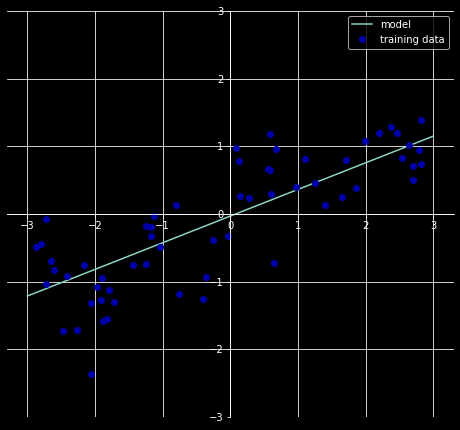

In [4]:
import mglearn 
import matplotlib.pyplot as plt
plt.style.use('dark_background') 
mglearn.plots.plot_linear_regression_wave()

Agregamos los ejes coordenados en la gráfica para facilitar la comprensión de la línea.

Mirando $w[0]$ vemos que la pendiente debería ser alrededor de 0.4, lo cual podemos confirmar visualmente en la gráfica.

* La intersección es donde la línea de predicción debe cruzar el eje $y$: 
* esto está ligeramente por debajo de cero, lo que también puede confirmar en la imagen.

Los modelos lineales para regresión se pueden caracterizar como modelos de regresión para los cuales la predicción es
* una línea para una sola característica, 
* un plano cuando se usan dos características o 
* un hiperplano en dimensiones más altas (es decir, cuando se usan más características).

## Comparación de predicciones 

Si compara las predicciones hechas por la línea recta con las hechas por el `KNeighborsRegressor` usar una línea recta para hacer predicciones parece muy restrictivo.

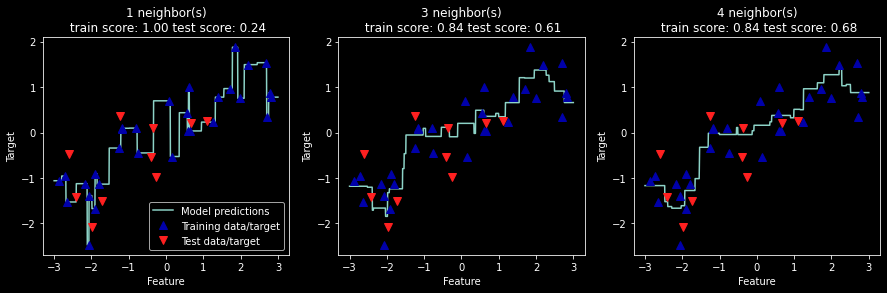

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
import mglearn 
X,y = mglearn.datasets.make_wave(n_samples = 40) 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 65)  
from sklearn.neighbors import KNeighborsRegressor 
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 4], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc = "best")
plt.savefig('regresion_con_KNN.jpg') 

Parece que se han perdido todos los detalles finos de los datos. 

Es una suposición poco realista de que nuestro objetivo $\mathbf{y}$ es una combinación lineal de las características.

Pero mirar datos unidimensionales da una perspectiva algo sesgada.

Para conjuntos de datos con muchas características, los modelos lineales pueden ser muy poderosos.

Si tiene más características que puntos de datos de entrenamiento, cualquier objetivo $y$ se puede modelar perfectamente (en el conjunto de entrenamiento) como una función lineal.

Hay muchos modelos lineales diferentes de regresión.

La diferencia entre estos modelos radica en: 
* cómo se aprenden los parámetros del modelo $w$ y $b$ a partir de los datos de entrenamiento, y 
* cómo se puede controlar la complejidad del modelo.

# Modelos lineales de regresión más populares.

### Linear regression (aka ordinary least squares)

### Regresión lineal (también conocida como mínimos cuadrados ordinarios)

La regresión lineal, o mínimos cuadrados ordinarios **(MCO)**, es el método lineal más simple y clásico para la regresión.

La regresión lineal encuentra los parámetros $w$ y $b$ que minimizan el error cuadrático medio entre:
* los valores predichos $\hat{y}$ 
* y los valores observados $y$, 

en el conjunto de entrenamiento.

El error cuadrático medio es el primedio de las diferencias cuadráticas entre las predicciones y los valores verdaderos.

$$ECM = \frac{1}{p+1} \sum_{i = 0}^{p} (y[i] - \hat{y}[i])^{2} $$

## Error cuadrático medio con sklearn

In [6]:
from sklearn.metrics import mean_squared_error
y = np.array([1,2,3])
y_p = np.array([0.9,1.9,2.9]) 
mse = mean_squared_error(y,y_p) 
mse 

0.010000000000000009

## Error cuadrático medio con numpy

In [8]:
import numpy as np 
y = np.array([1,2,3])
y_p = np.array([0.9,1.9,2.9]) 
mse = np.square(y-y_p).mean() 
mse 

0.010000000000000009

La regresión lineal no tiene parámetros, lo cual es un beneficio, pero tampoco tiene forma de controlar la complejidad del modelo.

Aquí está el código que produce un modelo:

In [9]:
import mglearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

* Los parámetros de "pendiente" $(w)$, también llamados pesos o coeficientes, se almacenan en el
  atributo `coef_`, 
* mientras que el desplazamiento o intercepción $(b)$ se almacena en el atributo `intercept_`:

In [10]:
print("Pesos o coeficientes: {}".format(lr.coef_))
print("Desplazamiento b: {}".format(lr.intercept_))

Pesos o coeficientes: [0.39390555]
Desplazamiento b: -0.031804343026759746


Es posible que observe el subrayado final de aspecto extraño al final de los atributos `coef_` e `intercept_`.

scikit-learn siempre almacena todo lo que se deriva de los datos de entrenamiento en atributos que terminan con un guión bajo al final.

Es decir, separarlos de los parámetros que establece el usuario.

* El atributo `intercept_` es siempre un único número flotante, 
* mientras que el atributo `coef_` es una matriz NumPy con una entrada por característica de entrada.

Como solo tenemos una característica de entrada única en el conjunto de datos de ondas `wave`, `lr.coef_` solo tiene una entrada única.

Veamos el rendimiento en el conjunto de entrenamiento y el rendimiento del conjunto de prueba:

In [ ]:
print("Precisión en el conjunto de entrenamiento: {:.2f}".format(lr.score(X_train, y_train)))
print("Presición en el conjunto de testeo: {:.2f}".format(lr.score(X_test, y_test)))

Un $R^{2}$ de alrededor de 0,66 no es muy bueno, pero podemos ver que los puntajes en los conjuntos de entrenamiento y prueba están muy cerca.

Esto significa que es probable que estemos desajustados, no sobreajustados.

Para este conjunto de datos unidimensionales, existe poco peligro de sobreajuste, ya que el modelo es muy simple (o restringido).

Sin embargo, con conjuntos de datos de mayor dimensión (es decir, conjuntos de datos con una gran cantidad de características), los modelos lineales se vuelven más poderosos y hay una mayor probabilidad de sobreajuste.

Veamos cómo funciona "LinearRegression" en un conjunto de datos más complejo, como el conjunto de datos de Boston Housing.

Recuerde que este conjunto de datos tiene 506 muestras y 105 características derivadas.

Primero, cargamos el conjunto de datos y lo dividimos en un conjunto de entrenamiento y uno de prueba.

Luego construimos el modelo de regresión lineal como antes:

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

When comparing training set and test set scores, we find that we predict very accurately
on the training set, but the $R^{2}$ on the test set is much worse:

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Esta discrepancia entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba es una clara señal de sobreajuste y, por lo tanto, deberíamos intentar encontrar un modelo que nos permita controlar la complejidad.

Una de las alternativas más utilizadas a la regresión lineal estándar es la regresión de crestas, que veremos a continuación.

## Ridge regression

La regresión de crestas (Ridge regression) también es un modelo lineal de regresión, por lo que la fórmula que usa para hacer predicciones es la misma que se usa para mínimos cuadrados ordinarios.

Sin embargo, en la regresión de crestas (Ridge regression), los coeficientes $(w)$ se eligen no solo para que predigan bien los datos de entrenamiento, sino también para ajustarse a una restricción adicional.

También queremos que la magnitud de los coeficientes sea lo más pequeña posible; en otras palabras, todas las entradas de $w$ deben estar cerca de cero.

De manera intuitiva, esto significa que cada característica debe tener el menor efecto posible en el resultado (lo que se traduce en tener una pequeña pendiente), sin dejar de predecir bien.

Esta restricción es un ejemplo de lo que se llama regularización.

La regularización significa restringir explícitamente un modelo para evitar el sobreajuste.

El tipo particular utilizado por la regresión de crestas se conoce como regularización $L2$.

La regresión de crestas se implementa en `linear_model.Ridge`.

Veamos qué tan bien le va en el conjunto de datos ampliado de Boston Housing:

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Como puede ver, la puntuación del conjunto de entrenamiento (train set score) de `Ridge` es más baja que la de `LinearRegression`, mientras que la puntuación del conjunto de prueba es más alta.

Esto es consistente con nuestras expectativas. 

Con la regresión lineal, estábamos sobreajustando nuestros datos.

`Ridge` es un modelo más restringido, por lo que es menos probable que hagamos un sobreajuste.

Un modelo menos complejo significa un peor rendimiento en el conjunto de entrenamiento, pero una mejor generalización.

Como solo nos interesa el rendimiento de la generalización, deberíamos elegir el modelo `Ridge` sobre el modelo `LinearRegression`.

El modelo `Ridge` hace un compromiso entre la simplicidad del modelo (coeficientes cercanos a cero) y su rendimiento en el conjunto de entrenamiento.

El usuario puede especificar la importancia que el modelo otorga a la simplicidad frente al rendimiento del conjunto de entrenamiento, utilizando el parámetro `alpha`.

En el ejemplo anterior, usamos el parámetro predeterminado `alpha = 1.0`.

Sin embargo, no hay ninguna razón por la que esto nos dé la mejor compensación.

La configuración óptima de `alpha` depende del conjunto de datos particular que estemos usando.

El aumento de `alpha` obliga a los coeficientes a moverse más hacia cero, lo que disminuye el rendimiento del conjunto de entrenamiento, pero podría ayudar a la generalización.

Por ejemplo:

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

La disminución de `alpha` permite que los coeficientes sean menos restringidos, lo que significa que nos movemos hacia la derecha en la Figura 2-1.

In [ ]:
from IPython.display import Image 
Image('figure_2_1.JPG', width = 600, height = 300) 

Para valores muy pequeños de `alfa`, los coeficientes apenas están restringidos, y terminamos con un modelo que se parece a `LinearRegression`:

In [ ]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Aquí, `alpha = 0.1` parece estar funcionando bien.

Podríamos intentar disminuir `alpha` aún más para mejorar la generalización.

Por ahora, observe cómo el parámetro `alpha` corresponde a la complejidad del modelo, como se muestra en la Figura 2-1.

Discutiremos los métodos para seleccionar correctamente los parámetros en el Capítulo 5.

También podemos obtener una visión más cualitativa de cómo el parámetro `alpha` cambia el modelo al inspeccionar el atributo `coef_` de modelos con diferentes valores de `alpha`. 

Un `alpha` más alto significa un modelo más restringido, por lo que esperamos que las entradas de `coef_` tengan una magnitud menor para un valor alto de `alpha` que para un valor bajo de alfa.

Esto se confirma en el gráfico de la Figura 2-12:

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
plt.style.use('dark_background') 
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Figura 2-12. Comparación de magnitudes de coeficientes para regresión de crestas con diferentes valores de regresión alfa y lineal

Aquí, el eje $x$ enumera las entradas de `coef_`:` x = 0` muestra el coeficiente asociado con la primera característica, `x = 1` el coeficiente asociado con la segunda característica, y así sucesivamente hasta` x = 100 ".

El eje $y$ muestra los valores numéricos de los valores correspondientes de los coeficientes.

La conclusión principal aquí es que para `alpha = 10`, los coeficientes están en su mayoría entre –3 y 3.

Los coeficientes del modelo `Ridge` con `alpha = 1` son algo mayores.

Los puntos correspondientes a `alpha = 0.1` tienen una magnitud mayor todavía, y muchos de los puntos correspondientes a la regresión lineal sin ninguna regularización (que sería `alpha = 0`) son tan grandes que están fuera del gráfico.

Otra forma de entender la influencia de la regularización es fijar un valor de `alpha` pero variar la cantidad de datos de entrenamiento disponibles.

Para la Figura 2-13, submuestreamos el conjunto de datos de Boston Housing y evaluamos "LinearRegression" y "Ridge (alpha = 1)" en subconjuntos de tamaño creciente (las parcelas que muestran el rendimiento del modelo en función del tamaño del conjunto de datos se denominan curvas de aprendizaje):

In [ ]:
mglearn.plots.plot_ridge_n_samples()

Figure 2-13. Learning curves for ridge regression and linear regression on the Boston Housing dataset

Como era de esperar, la puntuación de entrenamiento es más alta que la puntuación de la prueba para todos los tamaños de conjuntos de datos, tanto para la regresión lineal como para la cresta.

Debido a que la cresta está regularizada, la puntuación de entrenamiento de la cresta es más baja que la puntuación de entrenamiento para la regresión lineal en todos los ámbitos.

Sin embargo, la puntuación de la prueba para `Ridge` es mejor, particularmente para pequeños subconjuntos de datos.

Para menos de 400 puntos de datos, la regresión lineal no puede aprender nada.

A medida que el modelo dispone de más y más datos, ambos modelos mejoran y, al final, la regresión lineal se pone al día con `Ridge`.

La lección aquí es que con suficientes datos de entrenamiento, la regularización se vuelve menos importante, y dados suficientes datos, la `ridge` y la regresión lineal tendrán el mismo rendimiento (el hecho de que esto suceda aquí cuando se usa el conjunto de datos completo es solo por casualidad).

Otro aspecto interesante de la Figura 2-13 es la disminución del rendimiento del entrenamiento para la regresión lineal.

Si se agregan más datos, se vuelve más difícil para un modelo sobreajustar o memorizar los datos.

## Lasso

Una alternativa a Ridge para regularizar la regresión lineal es Lasso.

Al igual que con la regresión de crestas, el uso de `Lasso` también restringe los coeficientes para que estén cerca de cero, pero de una manera ligeramente diferente, llamada regularización "L1".

La consecuencia de la regularización "L1" es que cuando se usa el lazo, algunos coeficientes son exactamente cero.

Esto significa que el modelo ignora por completo algunas características.

Esto puede verse como una forma de selección automática de funciones.

Tener algunos coeficientes exactamente cero a menudo hace que un modelo sea más fácil de interpretar y puede revelar las características más importantes de su modelo.

Apliquemos el lazo al conjunto de datos ampliado de Boston Housing:

In [ ]:
import numpy as np 
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

As you can see, Lasso does quite badly, both on the training and the test set. 

This indicates that we are underfitting, and we find that it used only 4 of the 105 features.

Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. 

In the previous example, we used the default of `alpha=1.0`. 

To reduce underfitting, let’s try decreasing alpha. 

When we do this, we also need to increase the default setting of `max_iter` (the maximum number of iterations to run):

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. 

The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. 

This makes this model potentially easier to understand.

If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to `LinearRegression`:

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Again, we can plot the coefficients of the different models, similarly to Figure 2-12.
The result is shown in Figure 2-14:

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Figure 2-14. Comparing coefficient magnitudes for lasso regression with different values of alpha and ridge regression

For `alpha=1`, we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude. 

Decreasing alpha to 0.01, we obtain the solution shown as an upward pointing triangle, which causes most features to be exactly zero. 

Using `alpha=0.0001`, we get a model that is quite unregularized, with most coefficients nonzero and of large magnitude. 

For comparison, the best Ridge solution is shown as circles. 

The Ridge model with `alpha=0.1` has similar predictive performance as the lasso model with `alpha=0.01`, but using Ridge, all coefficients are nonzero.

In practice, ridge regression is usually the first choice between these two models.

However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. 

Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. 

scikit-learn also provides the `ElasticNet` class, which combines the penalties of Lasso and Ridge. 

In practice, this combination works best, though at the price of having two parameters to adjust:
one for the $L1$ regularization, and one for the $L2$ regularization.

## Linear models for classification

Linear models are also extensively used for classification. 

Let’s look at binary classification first. 

In this case, a prediction is made using the following formula:

$$ \hat{y} = w[0] \cdot x[0] + w[1] \cdot x[1] + \cdots + w[p] \cdot x[p] + b > 0 $$

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero.

If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1. This prediction rule is common to all linear models for classification.

Again, there are many different ways to find the coefficients (w) and the intercept (b).

For linear models for regression, the output, ŷ, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions). For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear
classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.
We will see examples of that in this section.

There are many algorithms for learning linear models. These algorithms all differ in the following two ways:
* The way in which they measure how well a particular combination of coefficients and intercept 
  fits the training data
* If and what kind of regularization they use

Different algorithms choose different ways to measure what “fitting the training set well” means. 

For technical mathematical reasons, it is not possible to adjust $w$ and $b$ to minimize the number of `misclassifications` the algorithms produce, as one might hope. 

For our purposes, and many applications, the different choices for item 1 in the preceding list (called loss functions) are of little significance.

The two most common linear classification algorithms are logistic regression, implemented in `linear_model.LogisticRegression`, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).

Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.

We can apply the `LogisticRegression` and `LinearSVC` models to the forge dataset, and visualize the decision boundary as found by the linear models (Figure 2-15):

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                            ax=ax, alpha=.7)  
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Figure 2-15. Decision boundaries of a linear `SVM` and logistic regression on the forge dataset with the default parameters

In this figure, we have the first feature of the forge dataset on the x-axis and the second feature on the $y$ - axis, as before. 

We display the decision boundaries found by `LinearSVC` and `LogisticRegression` respectively as straight lines, separating the area classified as class 1 on the top from the area classified as class 0 on the bottom. 

In other words, any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0.

The two models come up with similar decision boundaries. 

Note that both misclassify two of the points. 

By default, both models apply an $L2$ regularization, in the same way that Ridge does for regression.

For `LogisticRegression` and `LinearSVC` the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization. 

In other words, when you use a high value for the parameter $C$, `LogisticRegression` and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector $(w)$ that is close to zero.

There is another interesting aspect of how the parameter C acts. 

Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. 

Here is an illustration using `LinearSVC` (Figure 2-16):

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

Figure 2-16. Decision boundaries of a linear SVM on the forge dataset for different values of C

En el lado izquierdo, tenemos una C muy pequeña que corresponde a mucha regularización.

Most of the points in class 0 are at the bottom, and most of the points in class 1 are at the top. 

The strongly regularized model chooses a relatively horizontal line, misclassifying two points. 

In the center plot, C is slightly higher, and the model focuses more on the two misclassified samples, tilting the decision boundary. 

Finally, on the righthand side, the very high value of C in the model tilts the decision boundary a lot, now correctly classifying all points in class 0. 

One of the points in class 1 is still misclassified, as it is not possible to correctly classify all points in this dataset using a straight line. 

The model illustrated on the righthand side tries hard to correctly classify all points, but might not capture the overall layout of the classes well. In other words, this model is likely overfitting.

Similarly to the case of regression, linear models for classification might seem very restrictive in low-dimensional spaces, only allowing for decision boundaries that are straight lines or planes. 

Again, in high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly important when considering more features.

Let’s analyze LogisticRegression in more detail on the Breast Cancer dataset: